# Import Libraries

In [1]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# PCA
from sklearn.decomposition import PCA


# Helper Functions

In [2]:
def quick_look(x):
    print(data[x].value_counts())
    print(f'\nMissing Values: {data[x].isna().sum()}')

# Import Data

In [3]:
data = pd.read_csv('./datasets/working_data/austin_clean_breed_stats.csv')

In [4]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [5]:
data.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs', 'time_in_shelter'],
      dtype='object')

Convert datetimes.

In [6]:
data['date_in'] = pd.to_datetime(data['date_in'])
data['date_out'] = pd.to_datetime(data['date_out'])

data['time_in_shelter'] = pd.to_timedelta(data['time_in_shelter'])
data['time_in_shelter'] = data['time_in_shelter'].dt.days

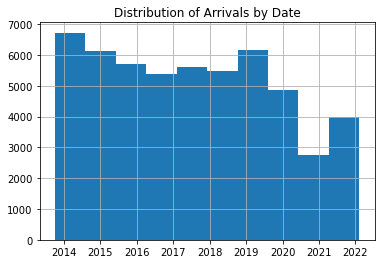

In [7]:
plt.title("Distribution of Arrivals by Date")
data['date_in'].apply(lambda x: x.date()).hist();

Convert index to date for exploration purposes.

In [8]:
data.index = data['date_in']
data['date'] = data['date_in'].apply(lambda x: x.date())

In [9]:
data['month'] = data['date'].apply(lambda x: x.month)

In [10]:
data[(data.index > pd.to_datetime('2021-1-01'))]

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,date,month
date_in,,,,,,,,,,,,,,,,,,,,,
2021-08-28 03:59:00,A362851,Mr. Leo,2021-08-28 03:59:00,4201 Monterey Oaks Boulevard in Austin (TX),public_assist,aged,17.0,dachshund,Brown/White,2021-08-28 11:48:00,...,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000,0,2021-08-28,8
2021-10-29 15:03:00,A491338,Honey,2021-10-29 15:03:00,2630 Exposition Boulevard in Austin (TX),stray,injured,15.0,labrador retriever,Yellow,2021-10-29 17:27:00,...,0.95,1.0,4.0,21.000000,24.000000,55.000000,80.000000,0,2021-10-29,10
2021-05-22 14:56:00,A500324,Alan,2021-05-22 14:56:00,4717 Highland Terrace in Austin (TX),stray,normal,13.0,australian shepherd,Blue Merle/Brown,2021-06-01 13:06:00,...,0.50,26.0,40.0,18.000000,23.000000,40.000000,60.000000,9,2021-05-22,5
2021-08-09 12:40:00,A501697,Lucy,2021-08-09 12:40:00,4404 Marlin Cove in Austin (TX),public_assist,normal,14.0,border collie,Black,2021-08-14 18:08:00,...,0.95,1.0,4.0,19.000000,21.000000,40.000000,40.000000,5,2021-08-09,8
2021-12-31 13:29:00,A523389,Nicco,2021-12-31 13:29:00,Gattling Gun in Austin (TX),stray,normal,14.0,pekingese,Brown/White,2022-01-02 12:32:00,...,0.10,81.0,100.0,17.941176,20.908497,42.934641,57.522876,1,2021-12-31,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-08 11:06:00,A851188,Static,2022-02-08 11:06:00,6812 Hillcroft Dr in Austin (TX),public_assist,normal,0.0,pit bull,Blue/White,2022-02-08 18:19:00,...,0.70,16.0,25.0,17.000000,19.000000,40.000000,50.000000,0,2022-02-08,2
2022-02-08 11:54:00,A851191,Rose,2022-02-08 11:54:00,Austin (TX),surrender,sick,2.0,doberman pinscher,Black,2022-02-08 14:32:00,...,0.95,1.0,4.0,26.000000,28.000000,60.000000,100.000000,0,2022-02-08,2
2022-02-08 14:11:00,A851204,A851204,2022-02-08 14:11:00,8400 Jamestown Drive in Austin (TX),stray,normal,3.0,dachshund,Brown Brindle/White,2022-02-10 12:39:00,...,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000,1,2022-02-08,2


Rolling 2 week average of dogs arriving at the shelter per day that are eventually adepted from 2020 until Jan 1, 2022.

/var/folders/3y/cshc407d2zv7031zkk2k4r1r0000gn/T/ipykernel_19998/2601702798.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan 2020', 'Apr 2020', 'Jul 2020', 'Oct 2020', 'Jan 2021', 'Apr 2021', 'Jul 2021', 'Oct 2021', 'Jan 2022'])


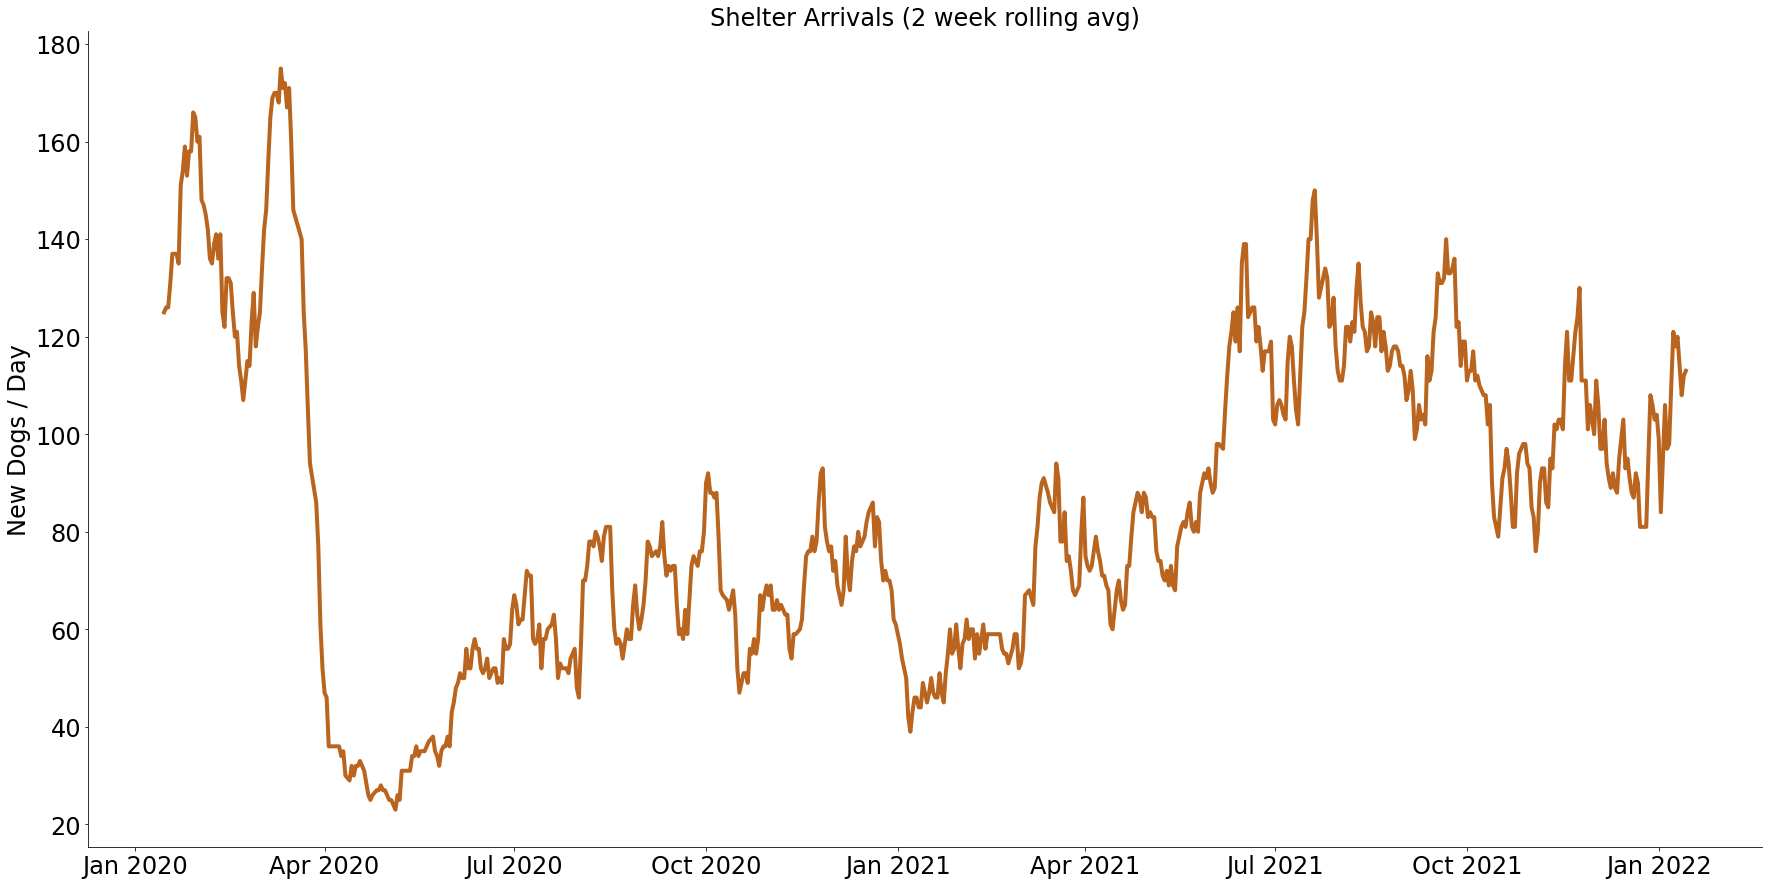

In [16]:
plot_data = data[(data.index > pd.to_datetime('2020-01-01')) & (data.index < pd.to_datetime('2022-01-15')) & (data['outcome'] == 'adoption')].groupby('date').size().rolling(14).sum()

fig, ax = plt.subplots(figsize=(30,15))
plt.plot(plot_data,
            linewidth=4,
            color='#b9641f')
plt.ylabel(r'New Dogs / Day', fontsize=24)
plt.xticks(rotation=0, size=24)
plt.yticks(size=24)

ax.set_xticklabels(['Jan 2020', 'Apr 2020', 'Jul 2020', 'Oct 2020', 'Jan 2021', 'Apr 2021', 'Jul 2021', 'Oct 2021', 'Jan 2022'])
plt.title("Shelter Arrivals (2 week rolling avg)", size=24)
fig.patch.set_facecolor('xkcd:white')
sns.despine()
fig.savefig('./presentation_images/rolling_avg.png', transparent=False)


Drop unused columns.

In [335]:
data.drop(columns=['id', 'name', 'date_in', 'location', 'color', 'date_out', 'dob', 'intact_in'], inplace=True)

Average time spent in shelter.

In [336]:
data['time_in_shelter'].mean()

16.30482792582912

In [337]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,date,month
date_in,,,,,,,,,,,,,,,,,,,,,
2014-04-02 15:55:00,surrender,normal,10.0,dachshund,transfer,10.0,1,0,Senior,tricolor,...,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4,2014-04-02,4
2013-11-16 09:02:00,public_assist,injured,16.0,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,...,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0,2013-11-16,11
2013-11-16 14:46:00,stray,aged,15.0,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,...,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0,2013-11-16,11
2014-11-14 15:11:00,stray,normal,15.0,miniature schnauzer,return_owner,15.0,0,1,Senior,black,...,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0,2014-11-14,11
2014-09-15 11:28:00,stray,normal,15.0,lhasa apso,return_owner,15.0,1,0,Senior,brown,...,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0,2014-09-15,9


Doubtful dogs will have been in the system for multiple years. Will drop these observations from the data as they are going to cloud the results.

<AxesSubplot:>

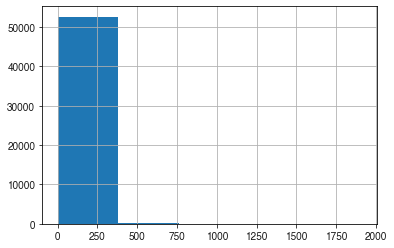

In [338]:
plt.title("Distribution of Time Spent in Shelter")
data['time_in_shelter'].hist(bins=5);

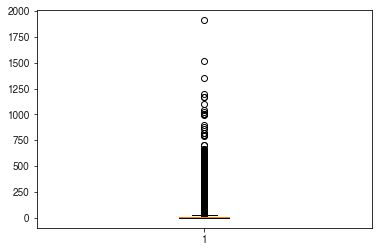

In [339]:
plt.title("Distribution of Time Spent in Shelter (Outliers)")
plt.boxplot(x=data['time_in_shelter']);

Data capped at 100 days in shelter. Starting to come into focus.

<AxesSubplot:>

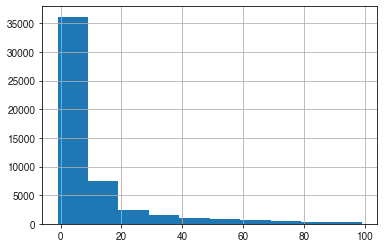

In [340]:
plt.title('Distribution of Time Spent in Shelter Capped at')
data[data['time_in_shelter'] < 100]['time_in_shelter'].hist()
plt.show()

Number of observations in the data with a time spent above 200. Only 500, so best to drop them from. Unlikely to be legit.

In [341]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['intake_type', 'condition', 'breed', 'outcome', 'age_out', 'age', 'time_in_shelter']]

,intake_type,condition,breed,outcome,age_out,age,time_in_shelter
date_in,,,,,,,
2016-01-05 11:37:00,stray,injured,pit bull,adoption,11.0,Senior,1912
2016-03-24 16:59:00,surrender,normal,pit bull,adoption,5.0,Adult,1521
2016-11-02 20:15:00,stray,normal,labrador retriever,transfer,6.0,Adult,1351
2018-08-17 14:37:00,surrender,normal,pit bull,adoption,11.0,Senior,1195
2018-04-05 14:39:00,stray,normal,boxer,adoption,13.0,Senior,1167
...,...,...,...,...,...,...,...
2017-10-11 17:50:00,surrender,normal,labrador retriever,adoption,8.0,Adult,202
2014-06-04 13:58:00,stray,normal,chihuahua,adoption,5.0,Adult,202
2017-09-29 12:22:00,stray,normal,boxer,adoption,10.0,Senior,201


In [342]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['breed']].value_counts()

breed                                   
pit bull                                    205
labrador retriever                           60
chihuahua                                    28
australian cattle dog                        23
bulldog                                      17
                                           ... 
harrier                                       1
jack russell terrier                          1
labrador retriever/australian cattle dog      1
labrador retriever/boxer                      1
yorkshire terrier                             1
Length: 85, dtype: int64

In [343]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['condition']].value_counts()

condition
normal       435
injured       52
sick          18
aged           8
other          4
behavior       1
medical        1
nursing        1
dtype: int64

These are likely incorrect exit dates due to a bad data merge or incorrectly labeled. Shelter has a max capacity of only 350 dogs per their website. Will explore pit bull time in shelter more closely to confirm we still see the extended time in shelter relationship. Considering the proportion of our data that is above 60 days in shelter (aveage being only 15 days), it is highly unlikely dogs will remain in the shelter for 200 days or more. Especially considering their condition upon entry is 'normal'.

In [344]:
data = data[data['time_in_shelter'] < 200].copy()

Dropping dogs in the shelter with extended stay.

In [345]:
quick_look('intake_type')

stray            38654
surrender         8968
public_assist     4239
abandoned          246
euth_request       164
Name: intake_type, dtype: int64

Missing Values: 0


In [346]:
quick_look('condition')

normal      46097
injured      2742
sick         1646
nursing      1153
aged          318
other         101
medical        88
pregnant       63
neonatal       44
behavior       19
Name: condition, dtype: int64

Missing Values: 0


In [347]:
data.groupby('intake_type').mean()['time_in_shelter']

intake_type
abandoned        15.308943
euth_request      3.274390
public_assist    11.221515
stray            12.550887
surrender        15.095897
Name: time_in_shelter, dtype: float64

In [348]:
data['intake_type'].value_counts(normalize=True)

stray            0.739492
surrender        0.171567
public_assist    0.081097
abandoned        0.004706
euth_request     0.003137
Name: intake_type, dtype: float64

In [349]:
data.groupby(by='intake_type').mean()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,month
intake_type,,,,,,,,,,,,,,
abandoned,1.284553,1.321138,0.491870,0.345528,0.796748,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.308943,6.382114
euth_request,8.286585,8.286585,0.567073,0.402439,0.859756,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.274390,7.146341
public_assist,3.518283,3.542109,0.582921,0.347488,0.864355,0.632681,21.551548,35.766921,15.958727,18.740488,38.495228,50.449358,11.221515,6.521821
stray,2.318285,2.345915,0.530476,0.275470,0.851995,0.636430,21.208318,35.788596,16.026496,18.941262,38.447295,51.173035,12.550887,6.623092
surrender,2.675401,2.698372,0.495317,0.241414,0.801070,0.625875,22.014101,37.007499,15.658726,18.536105,37.384999,50.045452,15.095897,6.569804


In [350]:
quick_look('outcome')

adoption        23732
transfer        13924
return_owner    12771
euthanasia       1522
died              263
disposal           41
missing            18
Name: outcome, dtype: int64

Missing Values: 0


Distribution of outcomes as sorted by intake type

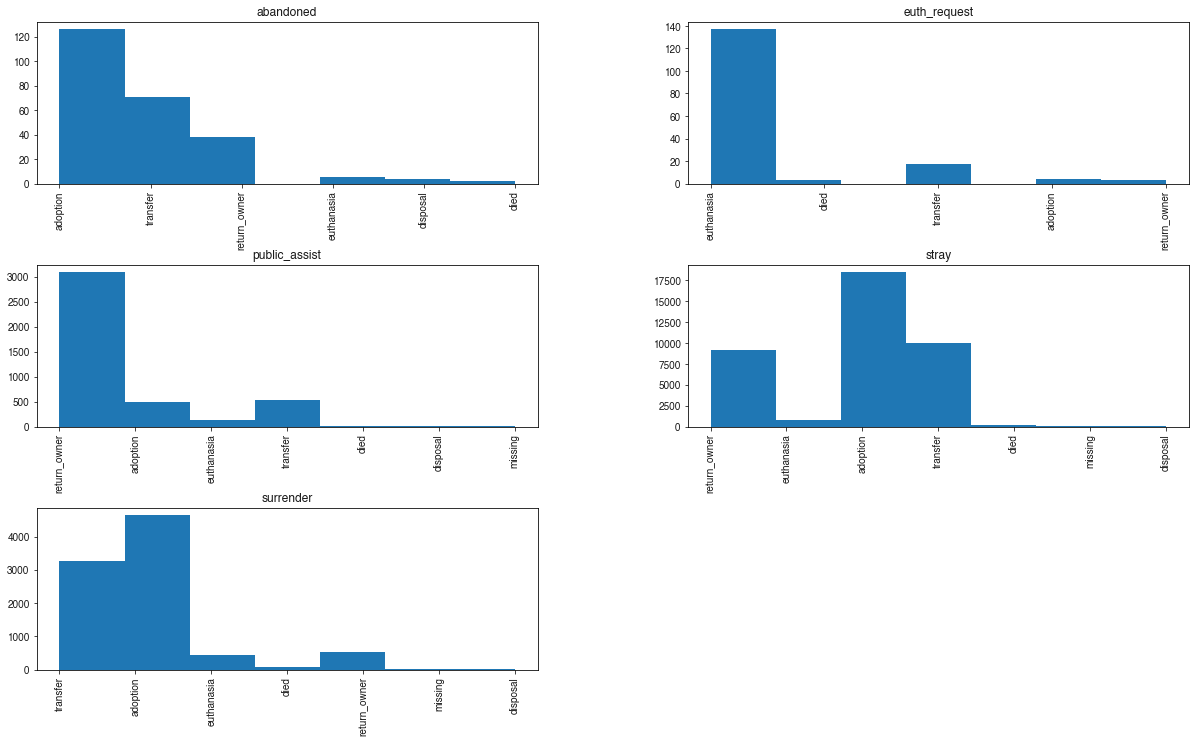

In [351]:
data['outcome'].hist(by=data['intake_type'], figsize=(20,12), bins=7);

Most strays and surrendered dogs get adopted or transfered to another rescue organization. You love to see it.

In [352]:
data = data[data['intake_type'] != 'euth_request'].copy()

Will drop euth requests from the set. Dogs are likely sick.

In [353]:
quick_look('sex')

1    27539
0    24568
Name: sex, dtype: int64

Missing Values: 0


No gender differences. (1 is male)

In [354]:
data.groupby('sex').mean()['time_in_shelter']

sex
0    12.924332
1    12.866517
Name: time_in_shelter, dtype: float64

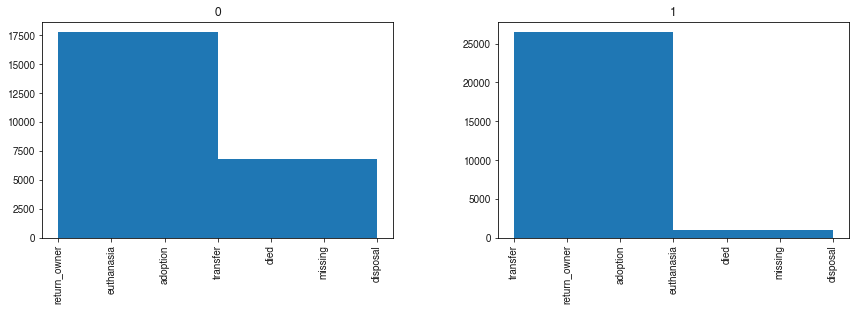

In [355]:
data['outcome'].hist(by=data['sex'], figsize=(14,4), bins=2);

In [356]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Senior    10.433380
Baby      10.518893
Young     13.306043
Adult     14.617946
Name: time_in_shelter, dtype: float64

Time spent in the shelter appears to have a relationship with age. Younger dogs tend to spend less time, on average, in the system than older dogs. Will need to dig into the Senior dogs a little more.

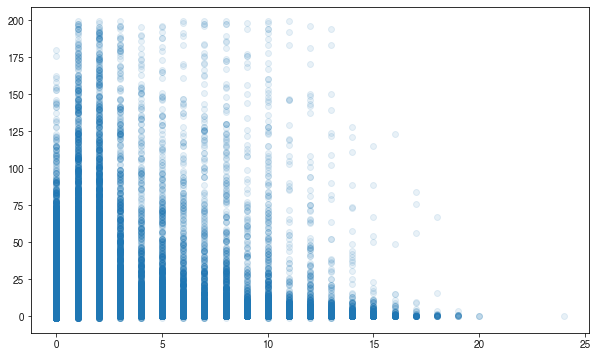

In [357]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'], alpha=.1);

In [358]:
data.describe()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,month
count,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000,52107.000000
mean,2.472489,2.499050,0.528509,0.275798,0.843975,0.634498,21.358938,35.973446,15.964335,18.861993,38.290816,50.949146,12.893776,6.604544
std,3.132268,3.144789,0.499191,0.446920,0.362883,0.260839,19.539076,29.716115,6.136908,6.518874,25.613502,32.492967,23.916978,3.495744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000,-1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.475000,1.000000,4.000000,10.000000,12.500000,16.000000,20.000000,2.000000,4.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,20.000000,40.000000,50.000000,5.000000,7.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,0.950000,33.500000,57.500000,21.000000,24.000000,55.000000,80.000000,11.000000,10.000000
max,24.000000,24.000000,1.000000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000,199.000000,12.000000


Inspect the change in shelter outcomes based on the number of dats spent in the shelter.

In [359]:
data[data['time_in_shelter'] <= 1]['outcome'].value_counts(normalize=True)

return_owner    0.621997
transfer        0.259981
adoption        0.055473
euthanasia      0.051979
died            0.009260
disposal        0.001223
missing         0.000087
Name: outcome, dtype: float64

In [360]:
data[data['time_in_shelter'] <= 2]['outcome'].value_counts(normalize=True)

return_owner    0.595115
transfer        0.258549
adoption        0.089274
euthanasia      0.047150
died            0.008637
disposal        0.001062
missing         0.000212
Name: outcome, dtype: float64

In [361]:
data[data['time_in_shelter'] <= 3]['outcome'].value_counts(normalize=True)

return_owner    0.524736
transfer        0.284431
adoption        0.136700
euthanasia      0.043557
died            0.009155
disposal        0.001194
missing         0.000227
Name: outcome, dtype: float64

In [362]:
time_in = {}
_ = {
'return_owner': 'Return to Owner',
'transfer': 'Transfer',
'adoption': 'Adoption',
'euthanasia': 'Other',
'died': 'Other',
'disposal': 'Other',
'missing': 'Other',
}
for day in range(1, 31):
    time_in[day] = data[data['time_in_shelter'] <= day]['outcome'].map(_).value_counts(normalize=True)


Very few dogs that spend less than a week in the shelter are adopted. They are typically collected by their owner, because they were lost, or transfered to a different rescue organization.

The following cell will generate pie charts representing the proportion of outcomes relative to the time spent in the shelter. Fairly large output, so consider skipping. Display purposes only.

In [ ]:
#define data
time_in = time_in[['Adoption', 'Return to Owner', 'Transfer', 'Other']]
labels = time_in.columns
explode = pie_chart_exploded = (0.02, 0, 0, 0)
colors = ['#b9641f', '#5a2519', '#eae1c7', '#ffffff']

for i in range(1, (time_in.shape[0] + 1)):
        plt.figure(figsize=(10,10))
        plt.pie(time_in.loc[i,], 
                # labels = labels, 
                colors = colors, 
                autopct='%.0f%%',
                explode=explode,
                wedgeprops={"edgecolor": "k",'linewidth': 2, 'antialiased': True},
                textprops={'fontsize': 20, 'color': 'black'}
                )

        # legend = plt.legend(loc="upper right", edgecolor="#5a2519", prop={'size': 12}, fontsize=24)
        # legend.get_frame().set_alpha(None)
        # legend.get_frame().set_facecolor((0, 0, 0, 0))
        plt.savefig(f'./presentation_images/outcome_{i}.png', bbox_inches='tight')
        plt.show()

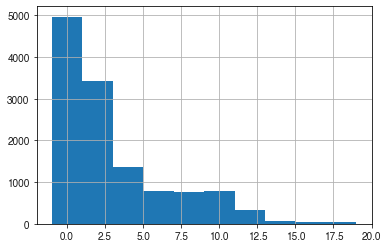

In [366]:
plt.title("Distribution of Dogs Returned to Owner")
data[(data['outcome'] == 'return_owner') & (data['time_in_shelter'] < 20)]['time_in_shelter'].hist();

Going to exclude dogs that are returned to the owner or transfered out. A large portion happen very quickly and will add noise to the predictions. Our goal is to predict adoption timeframes, first and foremost.

In [367]:
data = data[data['outcome'] != 'return_owner'].copy()

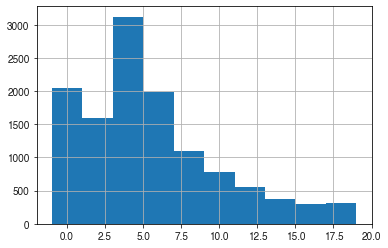

In [368]:
plt.title("Distribution of Dogs Transfered")
data[(data['outcome'] == 'transfer') & (data['time_in_shelter'] < 20)]['time_in_shelter'].hist();

Large drop off in transfers after 1 week. Figure the shelter comes up with a plan on how to best handle the animal and organizes with their partners.

In [369]:
data[data['outcome'] == 'transfer'].groupby('condition').size().sort_values()

condition
behavior        3
neonatal       27
pregnant       34
medical        40
other          41
aged           62
nursing       586
injured       857
sick          862
normal      11395
dtype: int64

Take a look at outcomes.

In [370]:
np.round(data.groupby('outcome').mean()['time_in_shelter'].sort_values(), 2)

outcome
disposal       4.00
died           8.55
euthanasia     9.16
transfer      10.12
adoption      20.07
missing       37.67
Name: time_in_shelter, dtype: float64

In [371]:
data.groupby('outcome').size().sort_values()

outcome
missing          18
disposal         41
died            260
euthanasia     1385
transfer      13907
adoption      23728
dtype: int64

In [372]:
data = data[~data['outcome'].isin(['missing', 'disposal', 'transfer'])].copy()

Can drop missing & disposal as they are a tiny sample size and likely only going to add noise. Dogs that are transfered are transferred quickly, typically

In [373]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905378
sick        19.595318
aged        20.950617
medical     28.146341
injured     29.472903
other       42.324324
nursing     51.485030
neonatal    55.181818
behavior    58.555556
pregnant    59.115385
Name: time_in_shelter, dtype: float64

In [374]:
data.groupby('condition').size().sort_values()

condition
behavior        9
neonatal       11
pregnant       26
other          37
medical        41
aged           81
nursing       501
sick          598
injured      1347
normal      22722
dtype: int64

Combine pregnant & nursing along with medical, sick & injured. Will drop neonatal as the dogs are too young to be released from the shelter within a specific time period and the dogs we are attempting to classify will all be older than a couple weeks.

In [375]:
data = data[data['condition'] != 'neonatal'].copy()

In [376]:
data.loc[data['condition'] == 'pregnant', 'condition'] = 'nursing'
data.loc[data['condition'] == 'medical', 'condition'] = 'injured'
data.loc[data['condition'] == 'sick', 'condition'] = 'injured'

In [377]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905378
aged        20.950617
injured     26.471299
other       42.324324
nursing     51.861480
behavior    58.555556
Name: time_in_shelter, dtype: float64

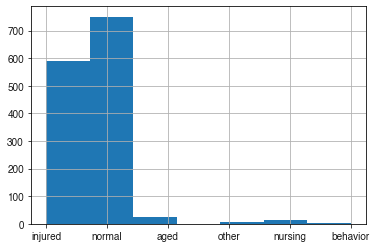

In [378]:
plt.title("Distribution of Intake Condition when Outcome is Euthanasia")
data[data['outcome']=='euthanasia']['condition'].hist(bins=7);

<AxesSubplot:>

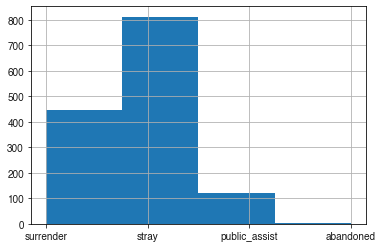

In [379]:
plt.title("Distribution of Intake Type when Outcome is Euthanasia")
data[data['outcome']=='euthanasia']['intake_type'].hist(bins=4);

Not too surprising to see most of the dogs that were put down came in as injured strays or surrendered by their owners.

In [380]:
data.groupby('outcome').mean()['time_in_shelter']

outcome
adoption      20.055064
died           8.550000
euthanasia     9.140173
Name: time_in_shelter, dtype: float64

In [381]:
data.groupby('condition').size().sort_values()

condition
behavior        9
other          37
aged           81
nursing       527
injured      1986
normal      22722
dtype: int64

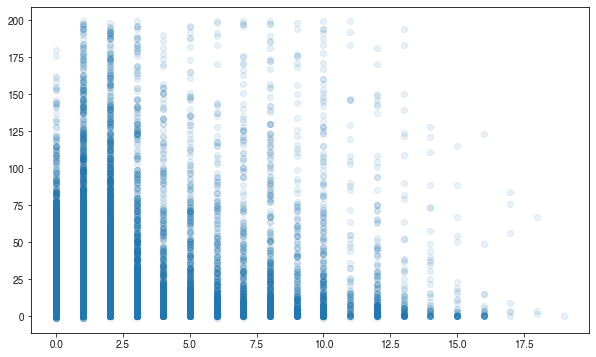

In [382]:
plt.title("Distribution of Ages by Time in Shelter")
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'], alpha=.1);

Starting to see the relationship between age and time in shelter come into focus. The proportion of senior dogs with longer wait times is developing. Older stray dogs are more likely to be put down than younger stray dogs, so when we remove those from the dataset, the averages time in shelter begins to fall in line with our assumption.

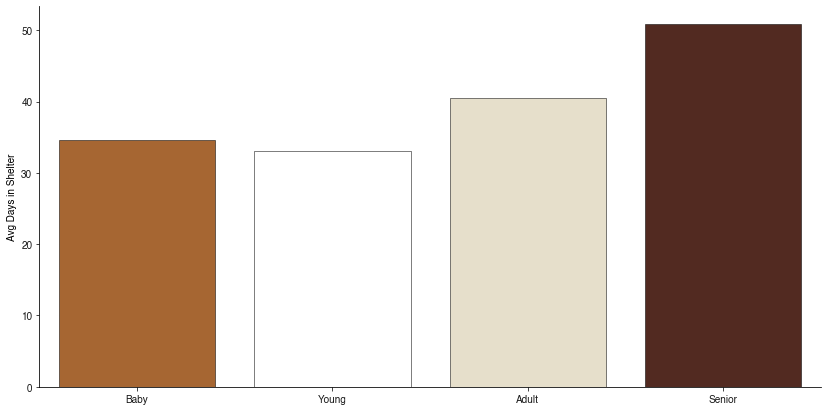

In [493]:
data[(data['time_in_shelter'] > 7) & (data['outcome']=='Adoption')].groupby(by=['age_in']).mean()['time_in_shelter'].index
plot_data = data[data['time_in_shelter'] > 7].copy()
plot_data = plot_data.groupby(by='age').mean()['time_in_shelter'].sort_values()

plt.figure(figsize=(14,7))
plt.ylabel('Avg Days in Shelter')
ax = sns.barplot(x=['Baby', 'Young', 'Adult', 'Senior'], y = [14.52, 17.66, 24.35, 29.92], palette=['#b9641f', '#ffffff', '#eae1c7', '#5a2519'], edgecolor="black", linewidth=.5)
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  # red   with alpha = 30%
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  # green with alpha = 50%
    "savefig.facecolor": (0.0, 0.0, 0.0, 0.0),  # blue  with alpha = 20%
})
# transparant background adapted: https://stackoverflow.com/a/62466259
sns.despine()

In [249]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Baby      14.521703
Young     17.660171
Adult     24.357340
Senior    28.926425
Name: time_in_shelter, dtype: float64

Younger dogs get adopted sooner.

In [250]:
data.groupby('intake_type').mean()['time_in_shelter'].sort_values()

intake_type
stray            18.827863
abandoned        19.130769
surrender        20.311115
public_assist    27.478191
Name: time_in_shelter, dtype: float64

In [251]:
data.groupby('condition').mean()['time_in_shelter'].sort_values()

condition
normal      17.905378
aged        20.950617
injured     26.471299
other       42.324324
nursing     51.861480
behavior    58.555556
Name: time_in_shelter, dtype: float64

In [252]:
data.groupby('outcome').mean()['time_in_shelter'].sort_values()

outcome
died           8.550000
euthanasia     9.140173
adoption      20.055064
Name: time_in_shelter, dtype: float64

Most common breeds

In [253]:
data['breed_1'].value_counts()[:20]

labrador retriever       4066
chihuahua                3890
pit bull                 3456
german shepherd          1997
australian cattle dog    1323
dachshund                 945
border collie             610
siberian husky            548
boxer                     481
australian shepherd       431
fox terrier               386
great pyrenees            382
jack russell terrier      380
miniature poodle          379
beagle                    347
cairn terrier             342
yorkshire terrier         338
pointer                   331
miniature schnauzer       301
anatolian sheepdog        289
Name: breed_1, dtype: int64

In [254]:
common_breeds = list(data['breed_1'].value_counts()[:20].index)

In [255]:
data[data['breed_1'].isin(common_breeds)].groupby('pure').mean()['time_in_shelter']

pure
0.0    19.920321
1.0    19.899961
Name: time_in_shelter, dtype: float64

No relationship to pure breed vs mutt

In [256]:
data[data['breed_1'].isin(common_breeds)]

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter,date,month
date_in,,,,,,,,,,,,,,,,,,,,,
2013-10-03 15:47:00,surrender,normal,16.0,dachshund,adoption,16.0,1,0,Senior,black,...,0.500,26.0,40.0,7.0,10.0,16.0,32.0,49,2013-10-03,10
2015-02-17 13:17:00,surrender,injured,14.0,border collie,euthanasia,14.0,1,0,Senior,black,...,0.950,1.0,4.0,19.0,21.0,40.0,40.0,0,2015-02-17,2
2016-09-28 12:05:00,public_assist,aged,17.0,chihuahua,adoption,17.0,1,0,Senior,tan,...,0.300,41.0,80.0,6.0,9.0,2.0,5.0,9,2016-09-28,9
2015-04-28 15:08:00,stray,injured,16.0,pit bull,euthanasia,16.0,0,0,Senior,brown,...,0.700,16.0,25.0,17.0,19.0,40.0,50.0,0,2015-04-28,4
2015-10-06 12:29:00,stray,normal,15.0,labrador retriever/beagle,adoption,15.0,1,0,Senior,sable,...,0.525,41.0,52.0,17.0,20.0,36.5,55.0,23,2015-10-06,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-02 06:59:00,abandoned,normal,0.0,siberian husky,adoption,0.0,0,0,Baby,black,...,0.500,26.0,40.0,20.0,23.0,40.0,60.0,7,2022-02-02,2
2022-02-02 15:49:00,abandoned,normal,0.0,australian cattle dog,adoption,0.0,0,0,Baby,brown,...,0.950,1.0,4.0,17.0,20.0,35.0,45.0,6,2022-02-02,2
2022-02-02 15:49:00,abandoned,normal,0.0,australian cattle dog,adoption,0.0,0,0,Baby,brown,...,0.950,1.0,4.0,17.0,20.0,35.0,45.0,7,2022-02-02,2


Least common breeds

In [257]:
data['breed_2'].value_counts().tail(25)

ibizan hound                   6
chinese crested                5
field spaniel                  5
keeshond                       4
irish wolfhound                4
samoyed                        3
clumber spaniel                3
kuvasz                         3
german pinscher                3
wirehaired pointing griffon    3
skye terrier                   3
belgian sheepdog               3
welsh springer spaniel         3
english setter                 3
saluki                         2
borzoi                         2
gordon setter                  2
lakeland terrier               2
irish setter                   2
english springer spaniel       1
japanese chin                  1
belgian tervuren               1
norwegian elkhound             1
otterhound                     1
old english sheepdog           1
Name: breed_2, dtype: int64

In [258]:
data['time_in_shelter'].mean()

19.341495150224745

Set time cutoffs

In [259]:
data['at_risk'] = np.where(data['time_in_shelter'] > 20, 1, 0)

In [260]:
data['at_risk'].value_counts(normalize=True)

0    0.752583
1    0.247417
Name: at_risk, dtype: float64

In [261]:
data[data['time_in_shelter'] > 7]['at_risk'].value_counts(normalize=True)

1    0.540995
0    0.459005
Name: at_risk, dtype: float64

We get a pretty clean balanced dataset to model by setting our cutoff above 7 days in the shelter and under 20. Minumum time is to allow for transfers and return to owner dogs to get processed. Hopefully we can bring exposure to the top 50% of dogs expected to spend the most amount of time in the shelter to help reduce the strain on shelters.

## Final Clean for export

In [262]:
data = data[data['time_in_shelter'] > 7].copy()

In [263]:
data = data[
        (data['intake_type'] != 'euth_request')                                         &
        (~data['outcome'].isin(['return_owner', 'missing', 'disposal', 'transfer']))    &
        (data['condition'] != 'neonatal')
]

In [264]:
data.loc[data['condition'] == 'pregnant', 'cond'] = 'nursing'
data.loc[data['condition'] == 'medical', 'cond'] = 'injured'
data.loc[data['condition'] == 'sick', 'cond'] = 'injured'
data['age'] = data['age'].str.lower()

# Export Model Data

In [267]:
data.to_csv('./datasets/working_data/model_data_full.csv', index=False)

[Run Next](https://github.com/gwoodstock/gooddogs/blob/main/6_models_regression.ipynb): Regression Models.